# Bayesian Logistic Regression with Laplace Approximation

In [1]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

np.random.seed(0)

## Base class

In [2]:
class LogisticRegression():
    @staticmethod
    def _sigmoid(z):
        return 1 / (1 + np.exp(-z))

## Main class

In [26]:
class BayesianLogisticRegression(LogisticRegression):
    def __init__(self, n_iter=1000):
        self._n_iter = n_iter
        self._w = None
        
        # Initialize hyperparamters for Gaussian prior
        self._w_mean = None
        self._w_scale = None
                

    def fit(self, X, t):
        """
        X -> np.ndarray(size=(n, p))
        t -> np.ndarray(size=(n, 1))
        w -> np.ndarray(size=(p, 1))
        """
        
        # weight initialization
        input_shape = X.shape
        self._w = np.zeros(input_shape[1])
        
        # w prior parameter initilization
        self._w_scale = 1. * np.eye(self._w.shape[0]) 
        self._w_mean = np.zeros_like(self._w)
        
        for _ in range(self._n_iter):
            w_prev = self._w.copy()
            y = self._sigmoid(X@self._w)
            
            grad = X.T @ (y - t) + self._w_scale @ (self._w - self._w_mean)
            hessian = np.linalg.inv(self._w_scale) + (X.T * y * (1-y)) @ X
            
            self._w -= np.linalg.solve(hessian, grad)
            
            if np.allclose(w_prev, self._w):
                break
        
        self._w_mean = self._w
        self._w_scale = hessian
                
    def predict_proba(self, X):
        return self._sigmoid(X @ self._w)
        
    def predict_dist(self, X):
        """
        X -> np.ndarray(size=(n, p))
        t -> np.ndarray(size=(n, 1))
        w -> np.ndarray(size=(p, 1))
        """

        mu_a = X @ self._w_mean
        var_a = np.sum(np.linalg.solve(self._w_scale, X.T).T * X, axis=1)
        
        print(np.sum((X @ self._w_scale) * X, axis=1), np.sum((X @ self._w_scale) * X, axis=1).shape)
        print(np.sum(np.linalg.solve(self._w_scale, X.T).T * X, axis=1), np.sum(np.linalg.solve(self._w_scale, X.T).T * X, axis=1).shape)
        
#         print(X.shape, self._w_scale.shape, X.T.shape)
        
#         print(mu_a.shape, var_a.shape)
        
        return self._sigmoid(mu_a / np.sqrt(1 + np.pi * var_a / 8))

In [27]:
def create_data_set():
    x = np.random.normal(size=50).reshape(-1, 2)
    y = np.random.normal(size=50).reshape(-1, 2)
    y += np.array([2., 2.])
    return (np.concatenate([x, y]), np.concatenate([np.zeros(25), np.ones(25)]))


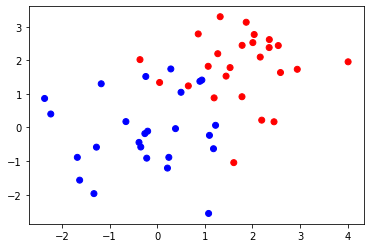

In [28]:
X, t = create_data_set()
colors = ['blue', 'red']
plt.scatter(X[:, 0], X[:, 1], c=[colors[int(label)] for label in t])

[  5140.02110988   4837.2041846    4560.86603881 ... 640862.34675256
 658774.71536069 677425.9086925 ] (10000,)
[ 148.09143131  135.51756913  124.16616454 ... 2241.04083638 2386.69459356
 2542.50646399] (10000,)


array([0.11625552, 0.11761423, 0.1190729 , ..., 0.93292004, 0.93320487,
       0.93344383])

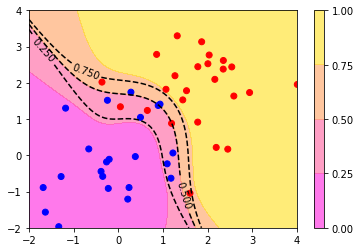

In [29]:
features = PolynomialFeatures(degree=3)

clf = BayesianLogisticRegression()
clf.fit(features.fit_transform(X), t)

X_test, Y_test = np.meshgrid(np.linspace(-2, 4, 100), np.linspace(-2, 4, 100))
x_test = np.array([X_test, Y_test]).transpose(1, 2, 0).reshape(-1, 2)

probs = clf.predict_proba(features.transform(x_test))
Probs = probs.reshape(100, 100)

dists = clf.predict_dist(features.transform(x_test))
Dists = dists.reshape(100, 100)

levels = np.linspace(0, 1, 5)
cp = plt.contour(X_test, Y_test, Probs, levels, colors='k', linestyles="dashed")
plt.clabel(cp, inline=True, fontsize=10)

plt.contourf(X_test, Y_test, Dists, levels, cmap="spring", alpha=0.6)
plt.colorbar()
plt.xlim(-2, 4)
plt.ylim(-2, 4)
colors = ['blue', 'red']
plt.scatter(X[:, 0], X[:, 1], c=[colors[int(label)] for label in t])

dists

In [7]:
features.fit_transform(X).shape

(50, 10)

In [8]:
np.linalg.inv(np.eye(10))

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])